In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
%matplotlib inline

In [18]:
bird_data = pd.read_csv('data/2016_CBCM_birds_willowbrook.csv', parse_dates = [2])
bird_data.describe()

,Chart Number,Bird Species,Admission Date,When Captured,Age,Sex,Address - Captured,City - Captured,Injury Cause,Status
count,2831,2831,2831,2831,2831,2831,2659,2817,2829,2831
unique,2831,143,294,2064,7,3,2122,153,25,13
top,2016-09404,Mallard,2016-09-29 00:00:00,10/19/16,A,UNK,PO Box 7178,Chicago,Collision - building,Released
freq,1,198,126,39,1346,2206,49,2291,1777,1893
first,NaN,NaN,2016-01-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,2016-12-30 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


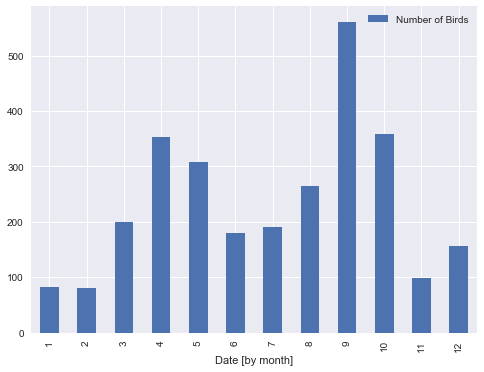

In [27]:
fig, ax = plt.subplots(figsize=(8, 6))
bird_data['Admission Date']
bird_data['Chart Number'].groupby(bird_data["Admission Date"].dt.month).count().plot(kind="bar")
ax.set_xlabel('Date [by month]')
plt.legend(['Number of Birds'], loc='best')
plt.show()